In [92]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated,Literal
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from pydantic import BaseModel,Field
import operator
import os   
load_dotenv()

True

In [93]:
class QuadraticEquation(TypedDict):
    a: int
    b: int
    c: int

    equation:str
    discriminant: float
    result:str



In [94]:
graph =StateGraph(QuadraticEquation)

In [95]:
def show_equation(state:QuadraticEquation):
    equation =f"{state["a"]}x2{state['b']}x{state['c']}"

    return {"equation":equation}


In [96]:
def calculate_discriminant(state:QuadraticEquation):
    discriminant = state["b"]**2-4*state["a"]*state["c"]
    return {"discriminant":discriminant}

In [97]:
def real_root(state:QuadraticEquation):

    root1 = (-state["b"]+state["discriminant"]**0.5)/(2*state["a"])
    root2 = (-state["b"]-state["discriminant"]**0.5)/(2*state["a"])


    result =f"The roots are {root1} and {root2}"

    return {"result":result}


In [98]:
def repeted_root(state:QuadraticEquation):
    root=(-state["b"])/(2*state["a"])

    result =f"Only repeat root {root}"

    return {"result":result}


In [99]:
def no_real_roots(state:QuadraticEquation):

    result =f"No real roots"

    return {"result":result}

In [100]:
def check_condition(state:QuadraticEquation)->Literal["real_root","repeted_root","no_real_roots"]:
    if state["discriminant"]>0:
        return "real_root"
    elif state["discriminant"]==0:
        return "repeted_root"
    else:
        return "no_real_roots"


In [101]:
graph.add_node("show_equation",show_equation)
graph.add_node("calculate_discriminant",calculate_discriminant)
graph.add_node("no_real_roots",no_real_roots)
graph.add_node("repeted_root",repeted_root)
graph.add_node("real_root",real_root)


graph.add_edge(START,"show_equation")
graph.add_edge("show_equation","calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant",check_condition)
# graph.add_conditional_edges("calculate_discriminant","no_real_roots")
# graph.add_conditional_edges("calculate_discriminant","repeted_root")

graph.add_edge("real_root",END)
graph.add_edge("repeted_root",END)
graph.add_edge("no_real_roots",END)



In [102]:
wrokflow = graph.compile()

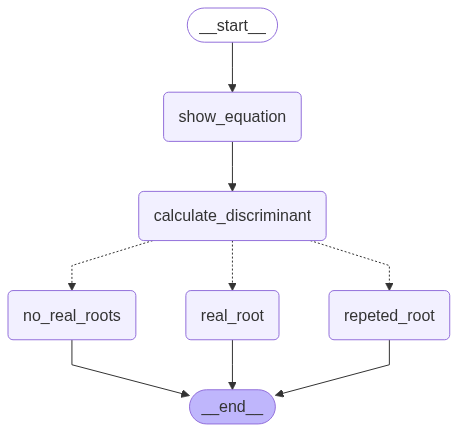

In [103]:
wrokflow

In [107]:
initial_state = {
    "a":4,
    "b":4,
    "c":4
}

wrokflow.invoke(initial_state)

{'a': 4,
 'b': 4,
 'c': 4,
 'equation': '4x24x4',
 'discriminant': -48,
 'result': 'No real roots'}